In [163]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # To ignore SettingWithCopyWarning warning

# Import data

In [164]:
path = 'C:/Users/Akis/OneDrive/Masters/Web Economics/Data/WebEcon Team Drive/Datasets Original/'
#train = pd.read_csv(path+"train.csv")
validation = pd.read_csv(path+"validation.csv")

In [165]:
#print(train.shape, validation.shape)

# Import Predictions

In [166]:
path='C:/Users/Akis/OneDrive/Masters/Web Economics/Data/WebEcon Team Drive/predictions/'
# lr_preds = pd.read_csv("Prediction_csv/lr_pCTR.csv", index_col  = "Unnamed: 0")
# rf_preds = pd.read_csv("Prediction_csv/rf_pCTR.csv", index_col  = "Unnamed: 0")
####xgb_preds = pd.read_csv("Prediction_csv/xgb_pCTR.csv", index_col  = "Unnamed: 0")
# dwane_preds = pd.read_csv("Prediction_csv/click_predictions_narrow.csv")
# lasso_preds = pd.read_csv("Prediction_csv/lasso_basebid.csv", index_col  = "Unnamed: 0")
# ridge_preds = pd.read_csv("Prediction_csv/ridge_basebid.csv", index_col  = "Unnamed: 0")
# elasticnet_preds = pd.read_csv("Prediction_csv/elasticnet_basebid.csv", index_col  = "Unnamed: 0")
# rfg_preds = pd.read_csv("Prediction_csv/rfg_basebid.csv", index_col  = "Unnamed: 0")
####xgbr_preds = pd.read_csv("Prediction_csv/xgb_basebid.csv", index_col  = "Unnamed: 0")

#xgb_preds = pd.read_csv(path+"xgb_pCTR.csv", index_col  = "Unnamed: 0")
xgb_preds = pd.read_csv(path+"xgb_pCTR.csv") #, index_col  = "Unnamed: 0
xgbr_preds = pd.read_csv(path+"xgb_basebid.csv", index_col  = "Unnamed: 0")
xgb_preds = xgb_preds.rename(index=str, columns={"pCTR": "click_proba"})

In [167]:
xgb_preds[xgb_preds["click_proba"]>=0.1].head(5)

,Unnamed: 0,bidid,click_proba
5,5,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,0.101252
18,18,db12485ab1e09236b00aa8de2f19cac829711996,0.250405
25,25,92ecd7842dd17411b6565de71d42d068930dd0fc,0.153806
40,40,ded61a53baf71f81935fd2e8c99ecbcd5f783f1a,0.172330
47,47,3a37037477b74366a22b5697c5e71375efe880b0,0.337294


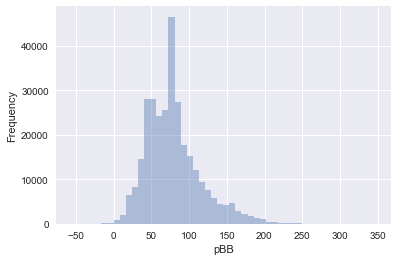

In [168]:
ax = sns.distplot(xgbr_preds["predicted_payprice"], kde=False)
ax.set(xlabel='pBB', ylabel='Frequency')
plt.savefig("pBBFrequency.png")
plt.show()

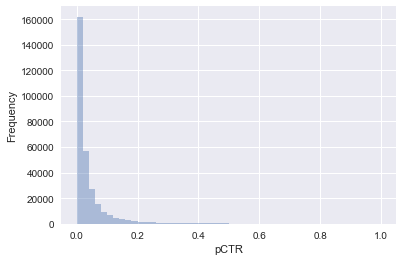

In [169]:
ax = sns.distplot(xgb_preds["click_proba"], kde=False)
ax.set(xlabel='pCTR', ylabel='Frequency')
plt.savefig("pCTRFrequency.png")
plt.show()

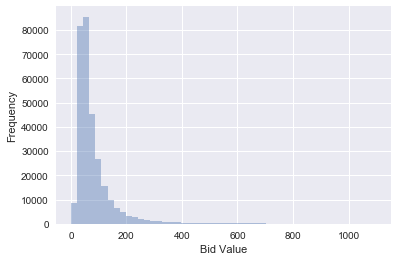

array([ 32.16239592,  48.44518542,  47.30503181, ..., 120.70757088,
        70.31862828,  32.9228502 ])

In [170]:
Strategy4(xgb_preds, xgbr_preds, 5 ,10)

In [100]:
#Strategy4(xgb_preds, xgbr_preds, 5 ,90)

In [8]:
##xgbr_preds["ratio"]=xgb_preds["click_proba"].values*200
#sns.distplot(xgbr_preds["ratio"])

In [9]:
#xgbr_preds["predicted_payprice"] = xgbr_preds["predicted_payprice"].map(lambda x: 0 if (x <=0) else x)
#xgbr_preds["predicted_payprice"] = xgbr_preds["predicted_payprice"].map(lambda x: 200 if (x >=200) else x)
#sns.distplot(xgbr_preds["predicted_payprice"])

In [10]:
#bidprice2 = xgbr_preds["predicted_payprice"].values*0.9 + xgbr_preds["ratio"].values * 1

In [11]:
# xgbr_preds["predicted_payprice"] = xgbr_preds["predicted_payprice"].map(lambda x: 0 if (x <=0) else x)
# xgbr_preds["predicted_payprice"] = xgbr_preds["predicted_payprice"].map(lambda x: 200 if (x >=200) else x)
# avgBB = xgbr_preds["predicted_payprice"].mean()
# xgbr_preds["predicted_payprice"] = xgbr_preds["predicted_payprice"].values-avgBB
# xgbr_preds["ratio"] = xgbr_preds["predicted_payprice"].map(lambda x: 1 if (x <=0) else avgBB/x)
# xgbr_preds["ratio"] =(xgbr_preds["ratio"].values*50/xgbr_preds["ratio"].values.max())

In [12]:
# sns.distplot(xgbr_preds["ratio"])

In [13]:
# avgCTR = xgb_preds["click_proba"].values.mean()
# xgb_preds["ratio"]=xgb_preds["click_proba"].values/avgCTR
# xgb_preds["ratio"]=xgb_preds["ratio"]*100/xgb_preds["ratio"].values.max()

In [14]:
# sns.distplot(xgb_preds["ratio"])

In [15]:
# sns.distplot(xgbr_preds["predicted_payprice"])

In [16]:
print("Predicted Bid Price Min:",xgbr_preds['predicted_payprice'].min())
print("Predicted Bid Price Max:",xgbr_preds['predicted_payprice'].max())
print("Predicted Bid Price Mean:",xgbr_preds['predicted_payprice'].mean())
print("Predicted Bid Price Std:",xgbr_preds['predicted_payprice'].std())

Predicted Bid Price Min: -56.3769416809082
Predicted Bid Price Max: 346.9530944824219
Predicted Bid Price Mean: 78.97979187519267
Predicted Bid Price Std: 36.59964614741393


# Linear Strategy

In [17]:
def Strategy1(sub_pCTR, sub_basebid, C ,BBimportance):
    
    #print(sub_basebid.head(100))
    importance = BBimportance * 10 
    avgCTR = sub_pCTR["click_proba"].mean()
    
    mean = sub_basebid["predicted_payprice"].mean()
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"]-mean
    sub_basebid["predicted_payprice"] = (importance * sub_basebid["predicted_payprice"]/sub_basebid["predicted_payprice"].max())
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"] + mean
    #importance is a constant to be played around with
    
    avgBB = sub_basebid["predicted_payprice"].mean()
    
    print("avBB/pBB Min:",(avgBB/sub_basebid["predicted_payprice"]).min())
    print("avBB/pBB Max:",(avgBB/sub_basebid["predicted_payprice"]).max())
#     print("avBB/pBB Mean:",(avgBB/sub_basebid["predicted_payprice"]).mean())
#     print("avBB/pBB Std:",(avgBB/sub_basebid["predicted_payprice"]).std())
#     print()
    
#     print("pCTR/avCTR Min:",(sub_pCTR["click_proba"]/ avgCTR).min())
#     print("pCTR/avCTR Max:",(sub_pCTR["click_proba"]/ avgCTR).max())
#     print("pCTR/avCTR Mean:",(sub_pCTR["click_proba"]/ avgCTR).mean())
#     print("pCTR/avCTR Std:",(sub_pCTR["click_proba"]/ avgCTR).std())
    
    bidprice1 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    #print(bidprice1.head(5))
    #sub_pCTR_["click_proba"] = (sub_pCTR_["click_proba"] + (1-avgCTR))**2 - (1-avgCTR)
    #bidprice2 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    return bidprice1

In [18]:
def Strategy2(sub_pCTR, sub_basebid, C ,BBimportance):
    
    
    
    #print(sub_basebid.head(2))
    importance = BBimportance * 10 
    avgCTR = sub_pCTR["click_proba"].values.mean()
    
    mean = sub_basebid["predicted_payprice"].values.mean()
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].values-mean
    sub_basebid["predicted_payprice"] = (importance * sub_basebid["predicted_payprice"].values/sub_basebid["predicted_payprice"].values.max())
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].values + mean
    #importance is a constant to be played around with
    
    avgBB = sub_basebid["predicted_payprice"].mean()
    
    print("avBB/pBB Min:",(avgBB/sub_basebid["predicted_payprice"].values).min())
    print("avBB/pBB Max:",(avgBB/sub_basebid["predicted_payprice"].values).max())
#     print("avBB/pBB Mean:",(avgBB/sub_basebid["predicted_payprice"]).mean())
#     print("avBB/pBB Std:",(avgBB/sub_basebid["predicted_payprice"]).std())
#     print()
    
    print("pCTR/avCTR Min:",(sub_pCTR["click_proba"]/ avgCTR).min())
    print("pCTR/avCTR Max:",(sub_pCTR["click_proba"]/ avgCTR).max())
#     print("pCTR/avCTR Mean:",(sub_pCTR["click_proba"]/ avgCTR).mean())
#     print("pCTR/avCTR Std:",(sub_pCTR["click_proba"]/ avgCTR).std())
    
    #bidprice1 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    sub_pCTR["click_proba"] = (sub_pCTR["click_proba"].values + (1-avgCTR))**2 - (1-avgCTR)
    bidprice2 = (avgBB/sub_basebid["predicted_payprice"].values) * (sub_pCTR["click_proba"].values/ avgCTR) * C
    return bidprice2

In [19]:
def Strategy3(sub_pCTR, sub_basebid, C ,BBimportance):
    
    avgCTR = sub_pCTR["click_proba"].values.mean()
    sub_pCTR["ratio"]=sub_pCTR["click_proba"].values/avgCTR
    sub_pCTR["ratio"]=sub_pCTR["ratio"]*100/sub_pCTR["ratio"].values.max()
    
    
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].map(lambda x: 0 if (x <=0) else x)
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].map(lambda x: 200 if (x >=200) else x)
    avgBB = sub_basebid["predicted_payprice"].mean()
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].values-avgBB
    sub_basebid["ratio"] = sub_basebid["predicted_payprice"].map(lambda x: 1 if (x <=0) else avgBB/x)
    #sub_basebid["ratio"]=avgBB/sub_pCTR["click_proba"].values
    #mean = sub_basebid["ratio"].values.mean()
    #meanCTRRatio = sub_pCTR["ratio"].values.mean()
    #sub_basebid["ratio"] = (sub_basebid["ratio"].values-mean)
    sub_basebid["ratio"] =(sub_basebid["ratio"].values*BBimportance/sub_basebid["ratio"].values.max())
    #sub_basebid["ratio"] = (sub_basebid["ratio"].values+1-mean)**(1)+mean-1
    #sub_basebid["ratio"]=sub_basebid["ratio"]+meanCTRRatio
    
    
    print("avBB/pBB Min:",sub_basebid["ratio"].values.min())
    print("avBB/pBB Max:",sub_basebid["ratio"].values.max())
    print("avBB/pBB Mean:",sub_basebid["ratio"].values.mean())
    
    print("pCTR/avCTR Min:",sub_pCTR["ratio"].values.min())
    print("pCTR/avCTR Max:",sub_pCTR["ratio"].values.max())
    print("pCTR/avCTR Mean:",sub_pCTR["ratio"].values.mean())
    
    #bidprice1 = (avgBB/sub_basebid["predicted_payprice"]) * (sub_pCTR["click_proba"]/ avgCTR) * C
    #sub_pCTR["click_proba"] = (sub_pCTR["click_proba"].values + (1-avgCTR))**2 - (1-avgCTR)
    #sub_pCTR["click_proba"] = (sub_pCTR["click_proba"].values + (1-avgCTR))**2 - (1-avgCTR)
    bidprice2 = sub_basebid["ratio"].values + sub_pCTR["ratio"].values * C
    
    return bidprice2

In [162]:
def Strategy4(sub_pCTR, sub_basebid, C ,BBimportance):
    sub_pCTR["click_proba"]=sub_pCTR["click_proba"].values*200
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].map(lambda x: 0 if (x <=0) else x)
    sub_basebid["predicted_payprice"] = sub_basebid["predicted_payprice"].map(lambda x: 200 if (x >=200) else x)
    bidprice2 = (sub_basebid["predicted_payprice"].values*BBimportance/100 + sub_pCTR["click_proba"].values * 1)*C
    ax = sns.distplot(bidprice2, kde=False)
    ax.set(xlabel='Bid Value', ylabel='Frequency')
    plt.savefig("pCTRFrequencyLow.png")
    plt.show()
    return bidprice2

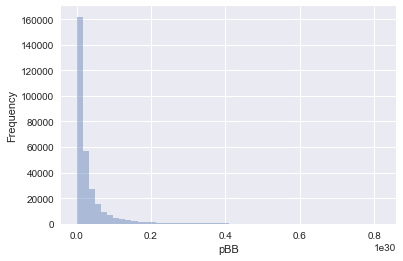

array([5.75224724e+27, 7.41384277e+27, 7.16763306e+26, ...,
       4.02067108e+28, 4.23600922e+28, 9.06147232e+27])

In [54]:
Strategy4(xgb_preds, xgbr_preds, 1 ,50)

In [21]:
#temp1 = Strategy1(xgb_preds, xgbr_preds, 93, 0) # 1 to 15 is a good range

In [22]:
#base_bid = train.loc[ train["click"] == 1, "payprice"].mean()
#base_bid

In [23]:
base_bid = 89
basebids = np.linspace(0.90*base_bid, 1.06*base_bid, 8)
basebids = np.linspace(5, 10, 13)
basebids

array([ 5.        ,  5.41666667,  5.83333333,  6.25      ,  6.66666667,
        7.08333333,  7.5       ,  7.91666667,  8.33333333,  8.75      ,
        9.16666667,  9.58333333, 10.        ])

# Evaluate Results

In [24]:
budget = 6250*1000

def ValidationDataFrame(submission_pCTR, submission_basebid, C, BBimportance,strategy):
    
    validation_check = validation[["bidid", "click", "bidprice", "payprice"]]
    validation_check["click_proba"] = submission_pCTR["click_proba"]
    validation_check["bidprice_predicted"] = strategy(submission_pCTR, submission_basebid, C , BBimportance)
    #print(validation_check.head(5))
    #print()
    
    return validation_check


def ValidateStrategy(df):
    
    impressions = 0
    clicks = 0
    cost = 0
    auctions_participated = 0
    balance = budget
    
    for row in df.iterrows():
        
        if cost < budget:
            
            auctions_participated+=1
            
            if (row[1]["bidprice_predicted"] >= row[1]["payprice"]):
                
                if (balance > row[1]["bidprice_predicted"]):
                    
                    impressions+=1
                    clicks+=row[1]["click"]
                    cost+=row[1]["payprice"]
                    balance-=row[1]["payprice"]
                else:
                    pass
    
        else:
            break
    
    # Metrics
    ctr = clicks*100/impressions
    cpm = cost/impressions
    #cpc = cost/clicks/1000
    cpc=10
    
    print("Strategy statistics:")
    print("Auctions participated: {} | Impressions: {} | Clicks: {} | Cost: {} | CTR: {} | CPM: {} | CPC: {}".format(auctions_participated, \
                                                                                                                     impressions, clicks, \
                                                                                                                     cost,\
                                                                                                                     np.round(ctr,5), \
                                                                                                                     np.round(cpm,5), \
                                                                                                                     np.round(cpc,2)))
    print("\n")
            
    return impressions, clicks, cost, auctions_participated, ctr, cpm, cpc

pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 0


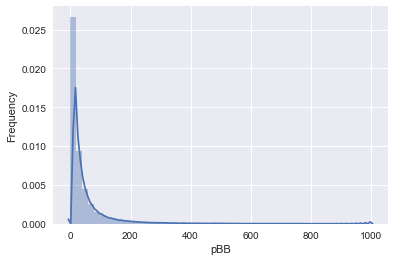

Strategy statistics:
Auctions participated: 303925 | Impressions: 70596 | Clicks: 136 | Cost: 3135455 | CTR: 0.19265 | CPM: 44.41406 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 1


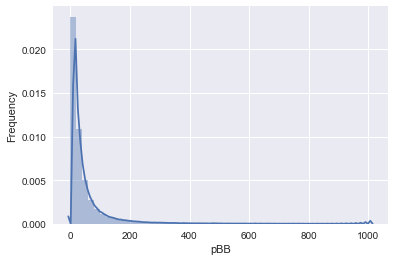

Strategy statistics:
Auctions participated: 303925 | Impressions: 77350 | Clicks: 137 | Cost: 3370597 | CTR: 0.17712 | CPM: 43.57591 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 2


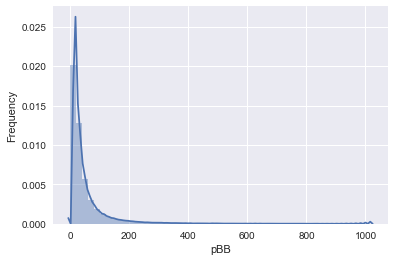

Strategy statistics:
Auctions participated: 303925 | Impressions: 84271 | Clicks: 138 | Cost: 3622394 | CTR: 0.16376 | CPM: 42.98506 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 3


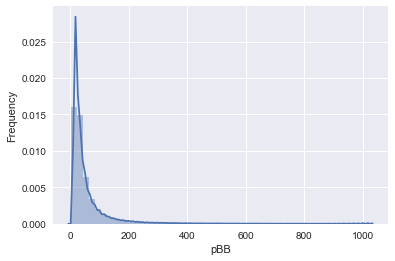

Strategy statistics:
Auctions participated: 303925 | Impressions: 91663 | Clicks: 141 | Cost: 3918376 | CTR: 0.15382 | CPM: 42.74763 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 4


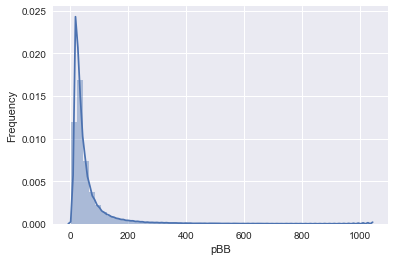

Strategy statistics:
Auctions participated: 303925 | Impressions: 99412 | Clicks: 145 | Cost: 4242656 | CTR: 0.14586 | CPM: 42.6775 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.0   Strategy: Strategy4   pBB Importance: 5


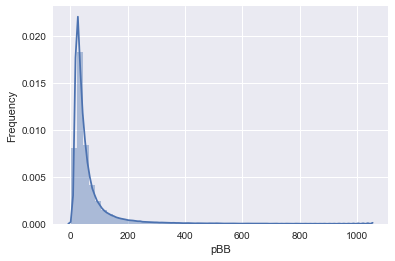

Strategy statistics:
Auctions participated: 303925 | Impressions: 107541 | Clicks: 146 | Cost: 4599014 | CTR: 0.13576 | CPM: 42.76522 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 0


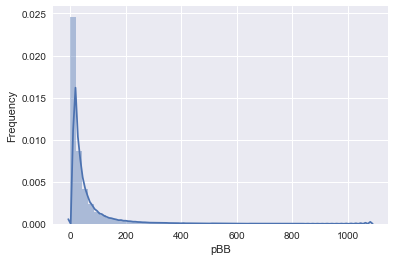

Strategy statistics:
Auctions participated: 303925 | Impressions: 75456 | Clicks: 138 | Cost: 3415893 | CTR: 0.18289 | CPM: 45.27 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 1


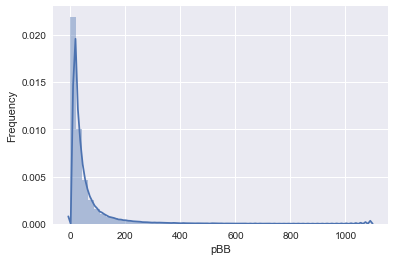

Strategy statistics:
Auctions participated: 303925 | Impressions: 82639 | Clicks: 140 | Cost: 3679558 | CTR: 0.16941 | CPM: 44.52568 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 2


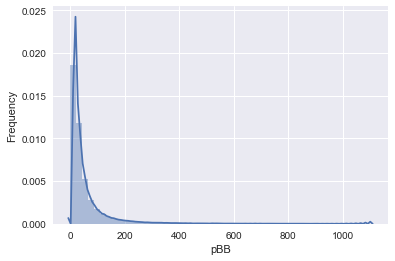

Strategy statistics:
Auctions participated: 303925 | Impressions: 90167 | Clicks: 142 | Cost: 3970673 | CTR: 0.15749 | CPM: 44.03688 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 3


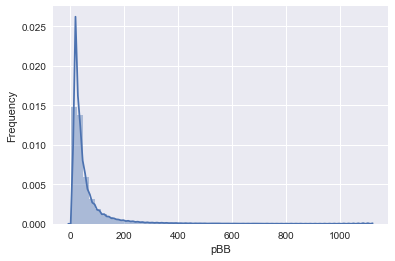

Strategy statistics:
Auctions participated: 303925 | Impressions: 98130 | Clicks: 143 | Cost: 4297859 | CTR: 0.14573 | CPM: 43.79761 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 4


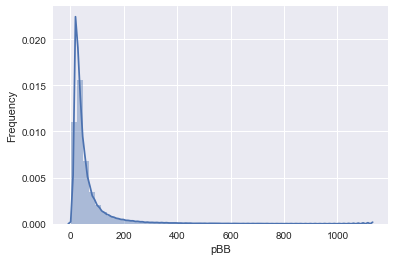

Strategy statistics:
Auctions participated: 303925 | Impressions: 106662 | Clicks: 149 | Cost: 4667573 | CTR: 0.13969 | CPM: 43.76041 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.416666666666667   Strategy: Strategy4   pBB Importance: 5


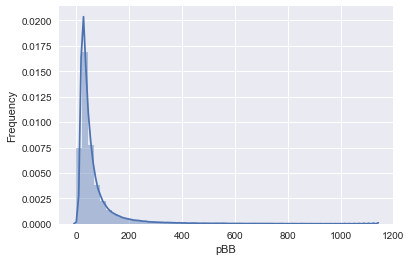

Strategy statistics:
Auctions participated: 303925 | Impressions: 115513 | Clicks: 151 | Cost: 5077483 | CTR: 0.13072 | CPM: 43.95594 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 0


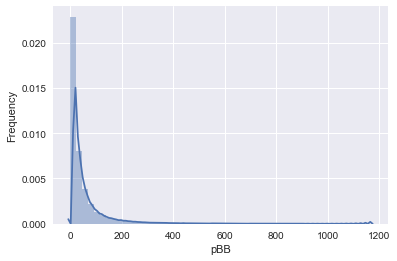

Strategy statistics:
Auctions participated: 303925 | Impressions: 79990 | Clicks: 140 | Cost: 3693239 | CTR: 0.17502 | CPM: 46.17126 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 1


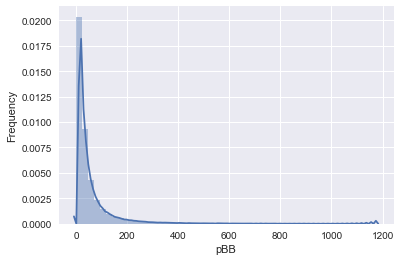

Strategy statistics:
Auctions participated: 303925 | Impressions: 87679 | Clicks: 143 | Cost: 3980206 | CTR: 0.16309 | CPM: 45.3952 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 2


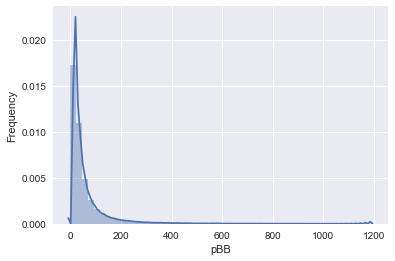

Strategy statistics:
Auctions participated: 303925 | Impressions: 95714 | Clicks: 143 | Cost: 4301236 | CTR: 0.1494 | CPM: 44.93842 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 3


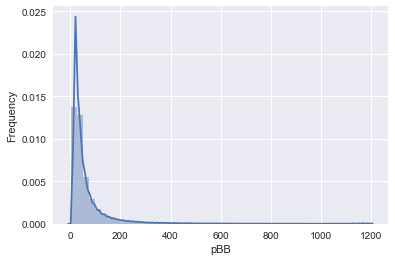

Strategy statistics:
Auctions participated: 303925 | Impressions: 104378 | Clicks: 150 | Cost: 4671029 | CTR: 0.14371 | CPM: 44.75109 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 4


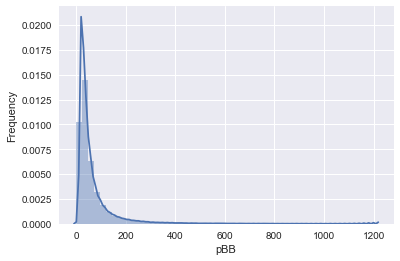

Strategy statistics:
Auctions participated: 303925 | Impressions: 113746 | Clicks: 153 | Cost: 5092719 | CTR: 0.13451 | CPM: 44.77273 | CPC: 10


pCTR model: Multi-Forrest   Constant: 5.833333333333333   Strategy: Strategy4   pBB Importance: 5


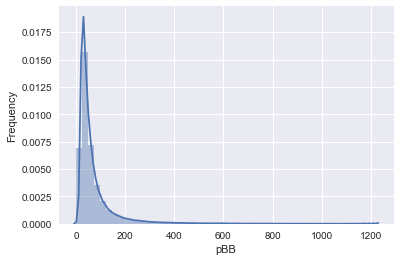

Strategy statistics:
Auctions participated: 303925 | Impressions: 123245 | Clicks: 154 | Cost: 5562621 | CTR: 0.12495 | CPM: 45.13466 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 0


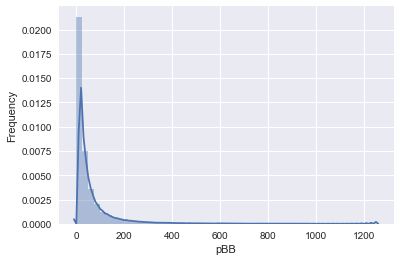

Strategy statistics:
Auctions participated: 303925 | Impressions: 84269 | Clicks: 143 | Cost: 3956398 | CTR: 0.16969 | CPM: 46.94963 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 1


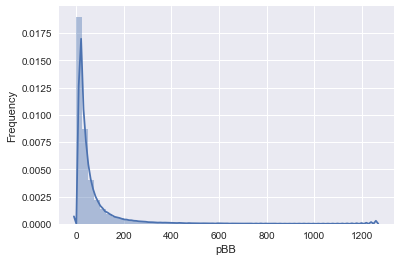

Strategy statistics:
Auctions participated: 303925 | Impressions: 92477 | Clicks: 145 | Cost: 4272853 | CTR: 0.1568 | CPM: 46.20449 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 2


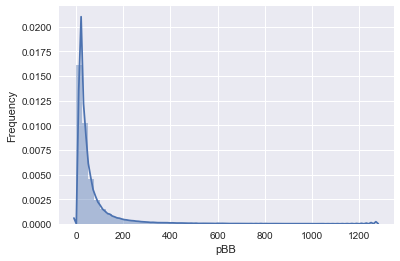

Strategy statistics:
Auctions participated: 303925 | Impressions: 101199 | Clicks: 149 | Cost: 4635166 | CTR: 0.14723 | CPM: 45.80249 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 3


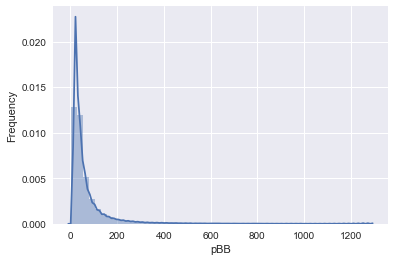

Strategy statistics:
Auctions participated: 303925 | Impressions: 110602 | Clicks: 154 | Cost: 5050898 | CTR: 0.13924 | CPM: 45.66733 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 4


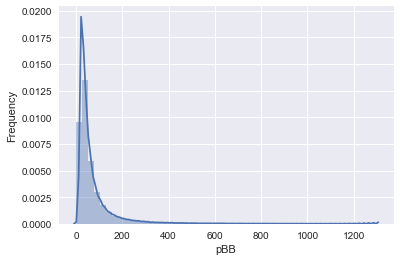

Strategy statistics:
Auctions participated: 303925 | Impressions: 120605 | Clicks: 156 | Cost: 5525571 | CTR: 0.12935 | CPM: 45.81544 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.25   Strategy: Strategy4   pBB Importance: 5


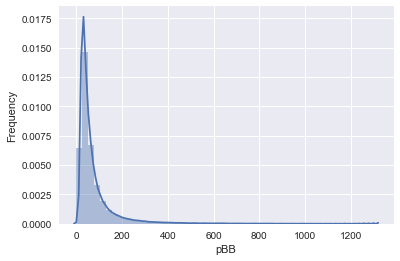

Strategy statistics:
Auctions participated: 303925 | Impressions: 130537 | Clicks: 157 | Cost: 6030562 | CTR: 0.12027 | CPM: 46.1981 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 0


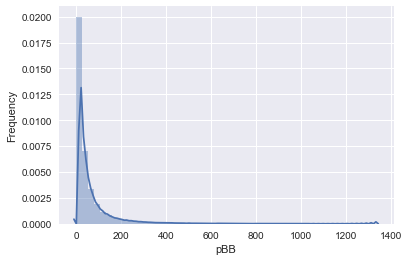

Strategy statistics:
Auctions participated: 303925 | Impressions: 88356 | Clicks: 146 | Cost: 4214418 | CTR: 0.16524 | CPM: 47.69815 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 1


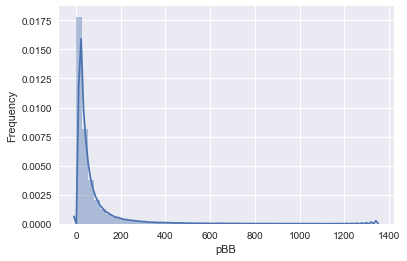

Strategy statistics:
Auctions participated: 303925 | Impressions: 97032 | Clicks: 149 | Cost: 4556757 | CTR: 0.15356 | CPM: 46.96138 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 2


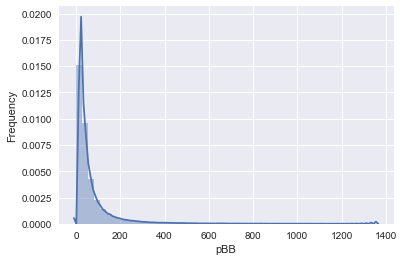

Strategy statistics:
Auctions participated: 303925 | Impressions: 106407 | Clicks: 153 | Cost: 4962398 | CTR: 0.14379 | CPM: 46.63601 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 3


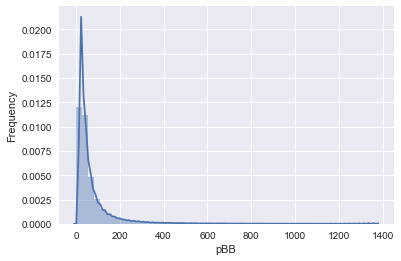

Strategy statistics:
Auctions participated: 303925 | Impressions: 116689 | Clicks: 156 | Cost: 5435236 | CTR: 0.13369 | CPM: 46.57882 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 4


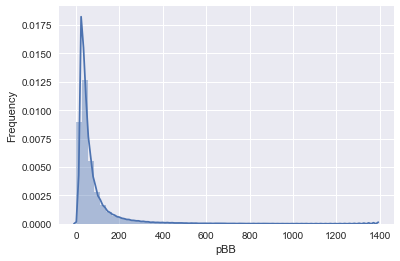

Strategy statistics:
Auctions participated: 303925 | Impressions: 127085 | Clicks: 158 | Cost: 5943348 | CTR: 0.12433 | CPM: 46.76672 | CPC: 10


pCTR model: Multi-Forrest   Constant: 6.666666666666667   Strategy: Strategy4   pBB Importance: 5


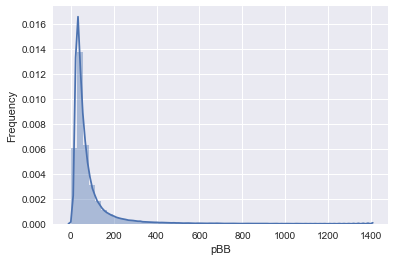

Strategy statistics:
Auctions participated: 303925 | Impressions: 132333 | Clicks: 150 | Cost: 6249993 | CTR: 0.11335 | CPM: 47.22929 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 0


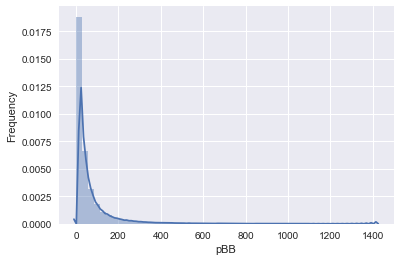

Strategy statistics:
Auctions participated: 303925 | Impressions: 92208 | Clicks: 149 | Cost: 4463234 | CTR: 0.16159 | CPM: 48.40398 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 1


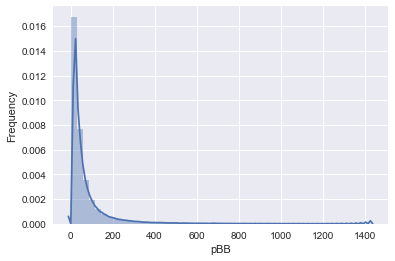

Strategy statistics:
Auctions participated: 303925 | Impressions: 101579 | Clicks: 152 | Cost: 4849261 | CTR: 0.14964 | CPM: 47.73881 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 2


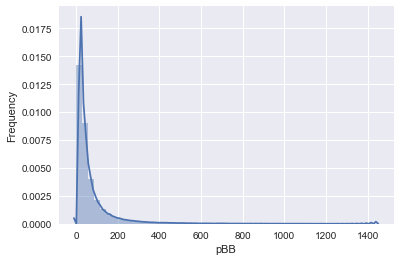

Strategy statistics:
Auctions participated: 303925 | Impressions: 111593 | Clicks: 154 | Cost: 5295883 | CTR: 0.138 | CPM: 47.45713 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 3


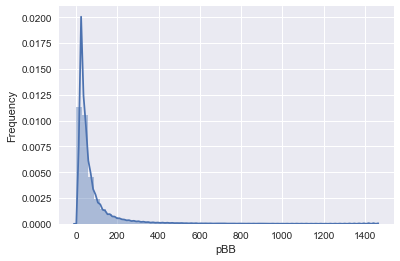

Strategy statistics:
Auctions participated: 303925 | Impressions: 122422 | Clicks: 159 | Cost: 5804844 | CTR: 0.12988 | CPM: 47.41667 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 4


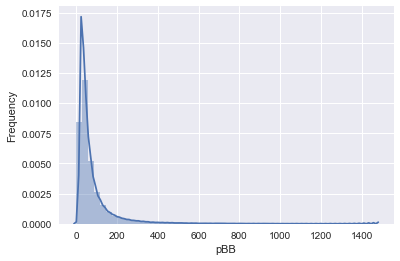

Strategy statistics:
Auctions participated: 303925 | Impressions: 131226 | Clicks: 155 | Cost: 6249997 | CTR: 0.11812 | CPM: 47.62773 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.083333333333334   Strategy: Strategy4   pBB Importance: 5


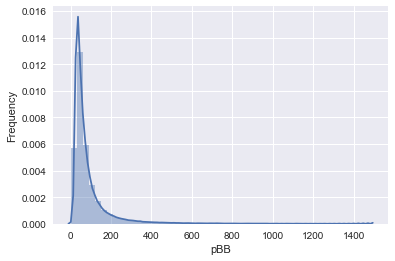

Strategy statistics:
Auctions participated: 303925 | Impressions: 129512 | Clicks: 141 | Cost: 6249997 | CTR: 0.10887 | CPM: 48.25805 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 0


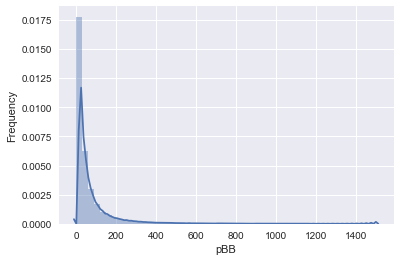

Strategy statistics:
Auctions participated: 303925 | Impressions: 96057 | Clicks: 149 | Cost: 4717766 | CTR: 0.15512 | CPM: 49.11423 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 1


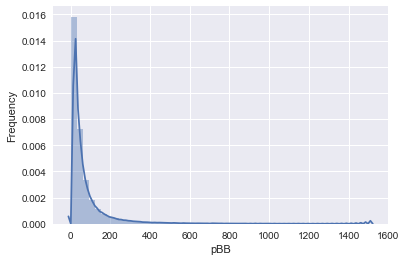

Strategy statistics:
Auctions participated: 303925 | Impressions: 105914 | Clicks: 155 | Cost: 5134572 | CTR: 0.14635 | CPM: 48.47869 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 2


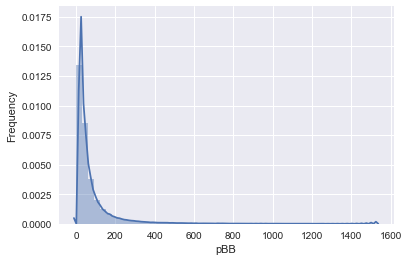

Strategy statistics:
Auctions participated: 303925 | Impressions: 116586 | Clicks: 158 | Cost: 5619871 | CTR: 0.13552 | CPM: 48.20365 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 3


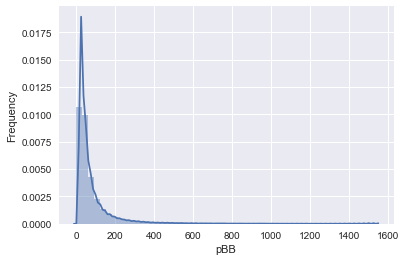

Strategy statistics:
Auctions participated: 303925 | Impressions: 127819 | Clicks: 160 | Cost: 6155992 | CTR: 0.12518 | CPM: 48.16179 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 4


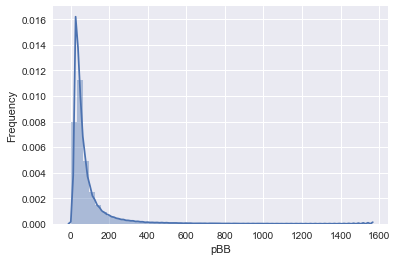

Strategy statistics:
Auctions participated: 303925 | Impressions: 128899 | Clicks: 142 | Cost: 6249998 | CTR: 0.11016 | CPM: 48.48756 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.5   Strategy: Strategy4   pBB Importance: 5


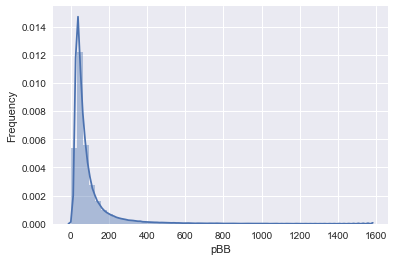

Strategy statistics:
Auctions participated: 303925 | Impressions: 127020 | Clicks: 138 | Cost: 6249998 | CTR: 0.10864 | CPM: 49.20483 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 0


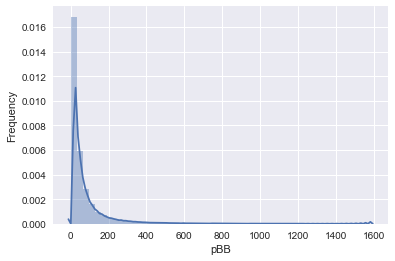

Strategy statistics:
Auctions participated: 303925 | Impressions: 99730 | Clicks: 152 | Cost: 4963811 | CTR: 0.15241 | CPM: 49.7725 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 1


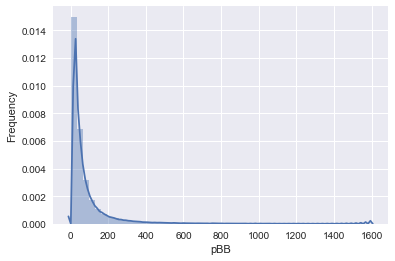

Strategy statistics:
Auctions participated: 303925 | Impressions: 110182 | Clicks: 157 | Cost: 5414539 | CTR: 0.14249 | CPM: 49.14177 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 2


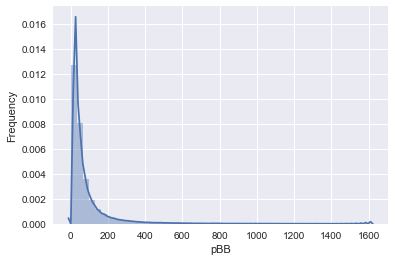

Strategy statistics:
Auctions participated: 303925 | Impressions: 121278 | Clicks: 160 | Cost: 5924181 | CTR: 0.13193 | CPM: 48.84794 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 3


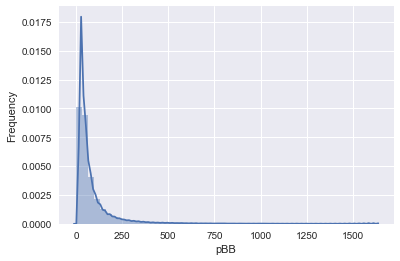

Strategy statistics:
Auctions participated: 303925 | Impressions: 127925 | Clicks: 152 | Cost: 6249994 | CTR: 0.11882 | CPM: 48.85671 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 4


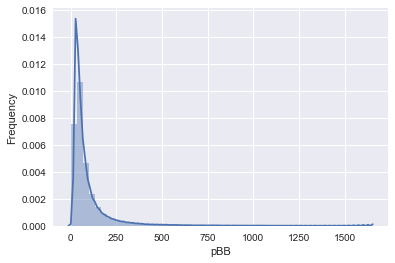

Strategy statistics:
Auctions participated: 303925 | Impressions: 126731 | Clicks: 139 | Cost: 6249996 | CTR: 0.10968 | CPM: 49.31703 | CPC: 10


pCTR model: Multi-Forrest   Constant: 7.916666666666667   Strategy: Strategy4   pBB Importance: 5


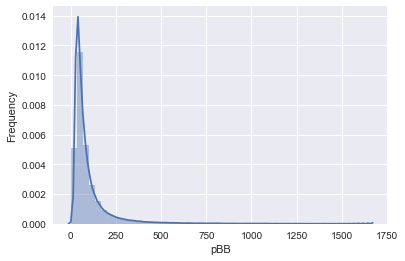

Strategy statistics:
Auctions participated: 303925 | Impressions: 124642 | Clicks: 133 | Cost: 6249996 | CTR: 0.10671 | CPM: 50.14358 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 0


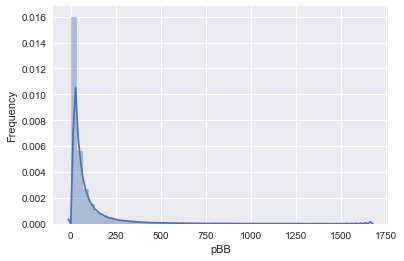

Strategy statistics:
Auctions participated: 303925 | Impressions: 103296 | Clicks: 154 | Cost: 5205168 | CTR: 0.14909 | CPM: 50.3908 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 1


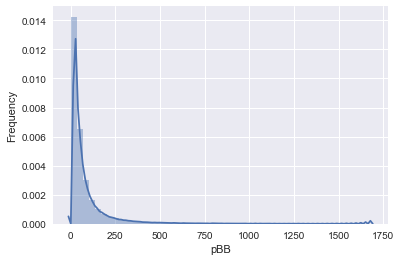

Strategy statistics:
Auctions participated: 303925 | Impressions: 114109 | Clicks: 159 | Cost: 5676320 | CTR: 0.13934 | CPM: 49.74472 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 2


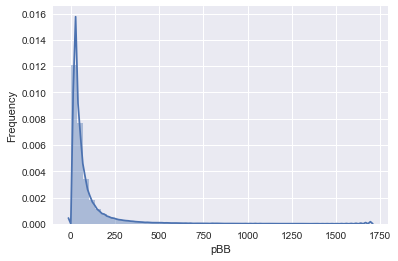

Strategy statistics:
Auctions participated: 303925 | Impressions: 125851 | Clicks: 161 | Cost: 6230875 | CTR: 0.12793 | CPM: 49.50994 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 3


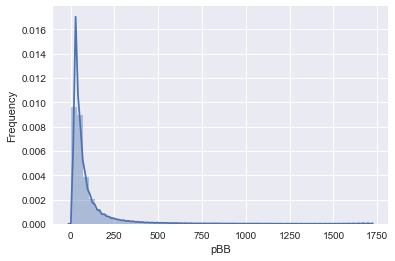

Strategy statistics:
Auctions participated: 303925 | Impressions: 126078 | Clicks: 141 | Cost: 6249997 | CTR: 0.11184 | CPM: 49.57246 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 4


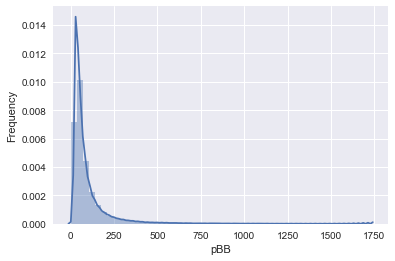

Strategy statistics:
Auctions participated: 303925 | Impressions: 124612 | Clicks: 135 | Cost: 6249996 | CTR: 0.10834 | CPM: 50.15565 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.333333333333334   Strategy: Strategy4   pBB Importance: 5


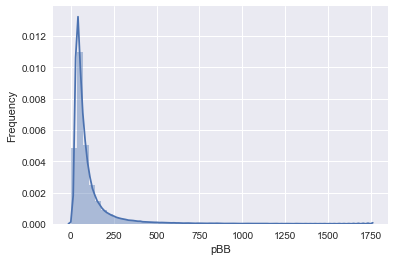

Strategy statistics:
Auctions participated: 303925 | Impressions: 122279 | Clicks: 128 | Cost: 6249995 | CTR: 0.10468 | CPM: 51.11258 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 0


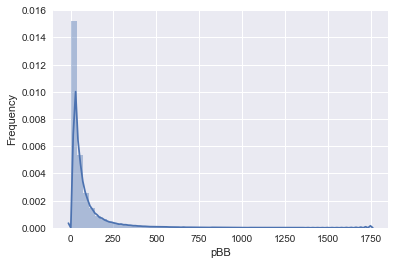

Strategy statistics:
Auctions participated: 303925 | Impressions: 106585 | Clicks: 157 | Cost: 5429913 | CTR: 0.1473 | CPM: 50.94444 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 1


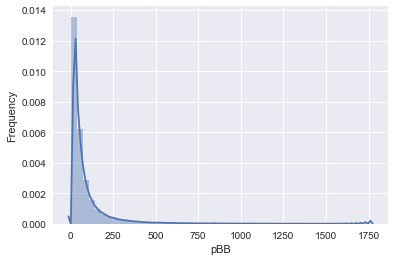

Strategy statistics:
Auctions participated: 303925 | Impressions: 118031 | Clicks: 160 | Cost: 5939569 | CTR: 0.13556 | CPM: 50.32211 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 2


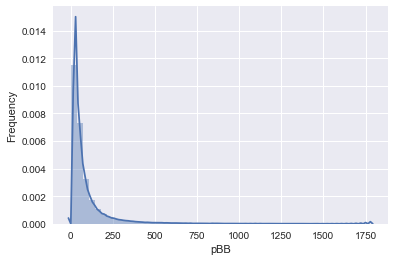

Strategy statistics:
Auctions participated: 303925 | Impressions: 124885 | Clicks: 150 | Cost: 6249996 | CTR: 0.12011 | CPM: 50.04601 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 3


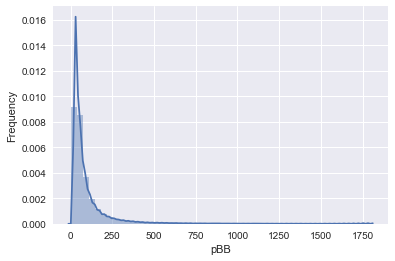

Strategy statistics:
Auctions participated: 303925 | Impressions: 124335 | Clicks: 140 | Cost: 6249998 | CTR: 0.1126 | CPM: 50.26741 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 4


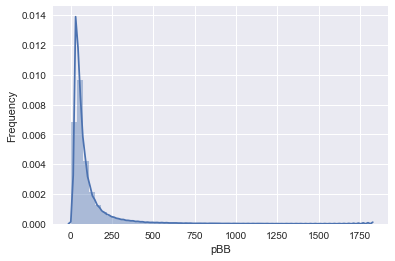

Strategy statistics:
Auctions participated: 303925 | Impressions: 122627 | Clicks: 133 | Cost: 6249999 | CTR: 0.10846 | CPM: 50.96756 | CPC: 10


pCTR model: Multi-Forrest   Constant: 8.75   Strategy: Strategy4   pBB Importance: 5


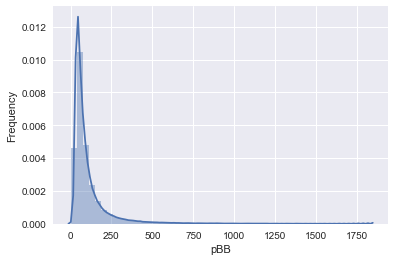

Strategy statistics:
Auctions participated: 303925 | Impressions: 120175 | Clicks: 124 | Cost: 6249998 | CTR: 0.10318 | CPM: 52.00747 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 0


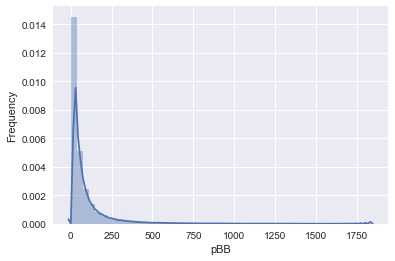

Strategy statistics:
Auctions participated: 303925 | Impressions: 109777 | Clicks: 159 | Cost: 5652425 | CTR: 0.14484 | CPM: 51.49007 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 1


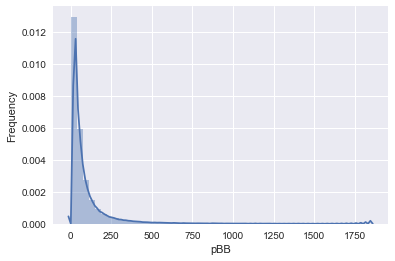

Strategy statistics:
Auctions participated: 303925 | Impressions: 121744 | Clicks: 160 | Cost: 6196474 | CTR: 0.13142 | CPM: 50.89757 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 2


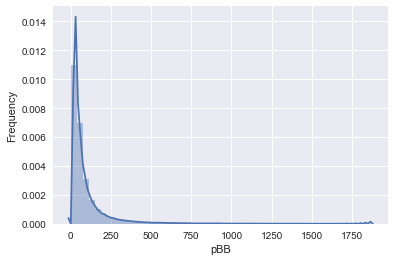

Strategy statistics:
Auctions participated: 303925 | Impressions: 123340 | Clicks: 141 | Cost: 6249996 | CTR: 0.11432 | CPM: 50.6729 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 3


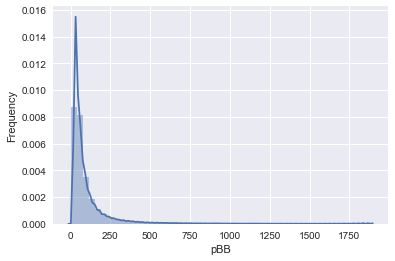

Strategy statistics:
Auctions participated: 303925 | Impressions: 122661 | Clicks: 137 | Cost: 6249995 | CTR: 0.11169 | CPM: 50.9534 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 4


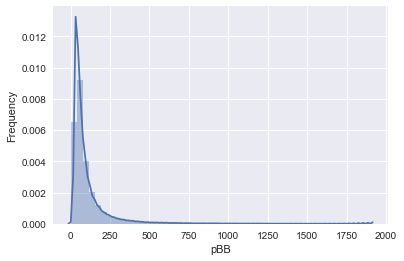

Strategy statistics:
Auctions participated: 303925 | Impressions: 120905 | Clicks: 128 | Cost: 6249998 | CTR: 0.10587 | CPM: 51.69346 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.166666666666668   Strategy: Strategy4   pBB Importance: 5


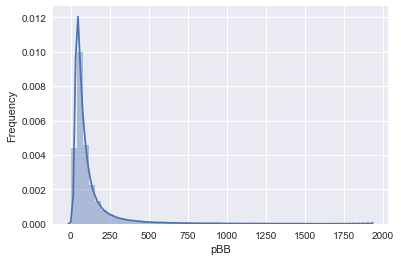

Strategy statistics:
Auctions participated: 303925 | Impressions: 118212 | Clicks: 115 | Cost: 6249999 | CTR: 0.09728 | CPM: 52.8711 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 0


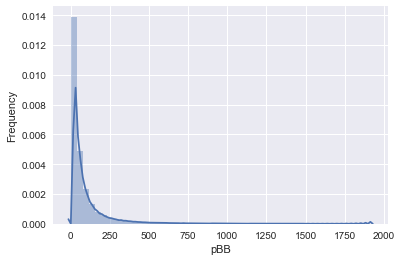

Strategy statistics:
Auctions participated: 303925 | Impressions: 113034 | Clicks: 160 | Cost: 5875502 | CTR: 0.14155 | CPM: 51.97995 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 1


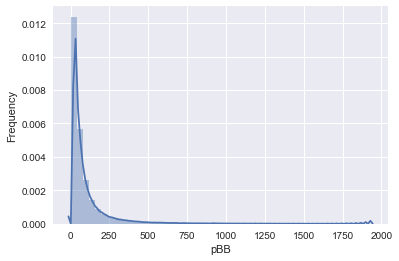

Strategy statistics:
Auctions participated: 303925 | Impressions: 121612 | Clicks: 152 | Cost: 6249997 | CTR: 0.12499 | CPM: 51.39293 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 2


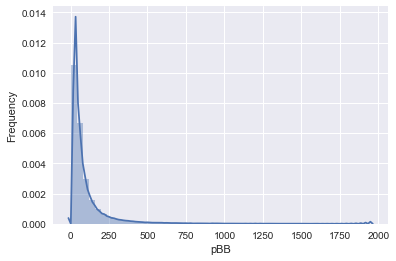

Strategy statistics:
Auctions participated: 303925 | Impressions: 121943 | Clicks: 140 | Cost: 6249997 | CTR: 0.11481 | CPM: 51.25343 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 3


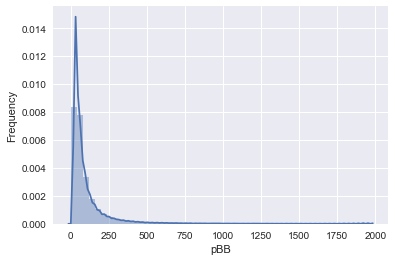

Strategy statistics:
Auctions participated: 303925 | Impressions: 121115 | Clicks: 133 | Cost: 6249996 | CTR: 0.10981 | CPM: 51.60381 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 4


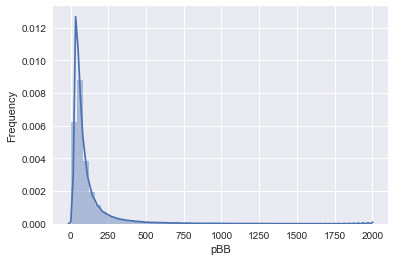

Strategy statistics:
Auctions participated: 303925 | Impressions: 119060 | Clicks: 125 | Cost: 6249995 | CTR: 0.10499 | CPM: 52.4945 | CPC: 10


pCTR model: Multi-Forrest   Constant: 9.583333333333334   Strategy: Strategy4   pBB Importance: 5


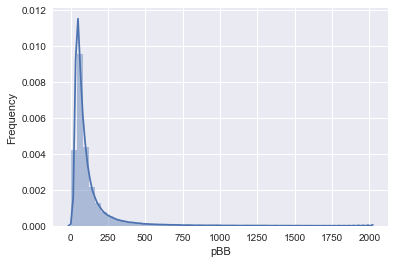

Strategy statistics:
Auctions participated: 303925 | Impressions: 116409 | Clicks: 110 | Cost: 6249995 | CTR: 0.09449 | CPM: 53.68996 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 0


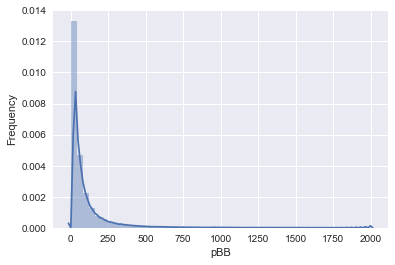

Strategy statistics:
Auctions participated: 303925 | Impressions: 116128 | Clicks: 160 | Cost: 6093876 | CTR: 0.13778 | CPM: 52.47551 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 1


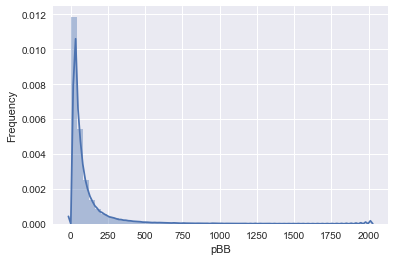

Strategy statistics:
Auctions participated: 303925 | Impressions: 120477 | Clicks: 143 | Cost: 6249998 | CTR: 0.11869 | CPM: 51.87711 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 2


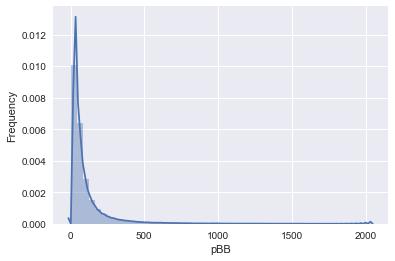

Strategy statistics:
Auctions participated: 303925 | Impressions: 120620 | Clicks: 139 | Cost: 6249996 | CTR: 0.11524 | CPM: 51.81559 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 3


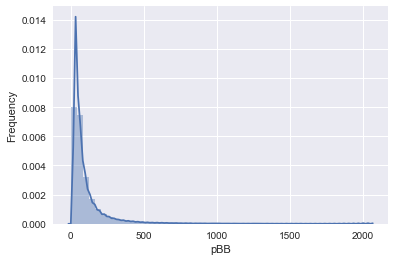

Strategy statistics:
Auctions participated: 303925 | Impressions: 119649 | Clicks: 129 | Cost: 6249995 | CTR: 0.10782 | CPM: 52.23608 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 4


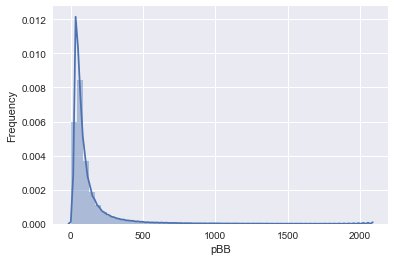

Strategy statistics:
Auctions participated: 303925 | Impressions: 117463 | Clicks: 118 | Cost: 6249999 | CTR: 0.10046 | CPM: 53.20824 | CPC: 10


pCTR model: Multi-Forrest   Constant: 10.0   Strategy: Strategy4   pBB Importance: 5


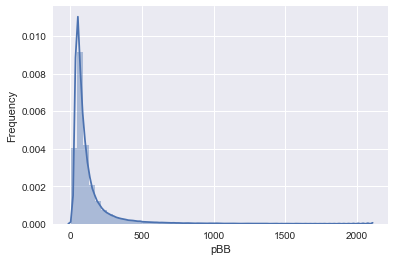

Strategy statistics:
Auctions participated: 303925 | Impressions: 114561 | Clicks: 104 | Cost: 6249996 | CTR: 0.09078 | CPM: 54.55605 | CPC: 10


Total time: 30.599048097928364 mins


In [25]:
pCTR_model_name = "Multi-Forrest"
results = pd.DataFrame(columns = ["pCTR_model", "Coefficient","pBB Importance","Impressions", "Clicks", "Cost", "CTR", "CPM", "CPC"])
i=0
Strategies=[Strategy4]

start = time.time()

for C in basebids:
    for BBIMPORTANCE in range(0,6,1): #10
        for strat in Strategies:
            print("pCTR model:",pCTR_model_name,"  Constant:",C,"  Strategy:",strat.__name__,"  pBB Importance:",BBIMPORTANCE)
            xgbr_preds_temp = xgbr_preds.copy(True)
            xgb_preds_temp = xgb_preds.copy(True)
            validation_check = ValidationDataFrame(xgb_preds_temp, xgbr_preds_temp, C, BBIMPORTANCE,strat)
            #print(validation_check.head(10))
            impressions, clicks, cost, auctions_participated, ctr, cpm, cpc = ValidateStrategy(validation_check)
            results.loc[i] = [pCTR_model_name, C,BBIMPORTANCE, impressions, clicks, cost, ctr, cpm, cpc]
            i+=1
    
end = time.time()
print("Total time: {} mins".format((end-start)/60))

In [26]:
results.sort_values(by = ["Clicks",'CTR'], ascending = False)

,pCTR_model,Coefficient,pBB Importance,Impressions,Clicks,Cost,CTR,CPM,CPC
50,Multi-Forrest,8.333333,2.0,125851.0,161.0,6230875.0,0.127929,49.509936,10.0
66,Multi-Forrest,9.583333,0.0,113034.0,160.0,5875502.0,0.141550,51.979953,10.0
72,Multi-Forrest,10.000000,0.0,116128.0,160.0,6093876.0,0.137779,52.475510,10.0
55,Multi-Forrest,8.750000,1.0,118031.0,160.0,5939569.0,0.135558,50.322110,10.0
44,Multi-Forrest,7.916667,2.0,121278.0,160.0,5924181.0,0.131928,48.847944,10.0
61,Multi-Forrest,9.166667,1.0,121744.0,160.0,6196474.0,0.131423,50.897572,10.0
39,Multi-Forrest,7.500000,3.0,127819.0,160.0,6155992.0,0.125177,48.161791,10.0
60,Multi-Forrest,9.166667,0.0,109777.0,159.0,5652425.0,0.144839,51.490066,10.0
49,Multi-Forrest,8.333333,1.0,114109.0,159.0,5676320.0,0.139340,49.744718,10.0
33,Multi-Forrest,7.083333,3.0,122422.0,159.0,5804844.0,0.129879,47.416673,10.0


In [ ]:
xgbr_preds.head(10)

In [ ]:
xgb_preds.head(10)

In [ ]:
results.to_csv("ValidationSet_Evaluation_Results_Individual_xgb_xcgr_Final_V2_XGB.csv")

In [ ]:
#results = pd.read_csv("ValidationSet_Evaluation_Results_Individual_xgb_xcgr.csv", index_col  = "Unnamed: 0")

In [ ]:
results.head()

In [ ]:
for 

In [ ]:
results.sort_values(by = ["Clicks",'CTR'], ascending = False)

In [ ]:
plt.figure(figsize = (10,8))

plt.subplot(4,1,1)
plt.plot(basebids, results["Clicks"])
plt.ylabel("Clicks")

plt.subplot(4,1,2)
plt.plot(basebids, results["Impressions"])
plt.ylabel("Impressions")

plt.subplot(4,1,3)
plt.plot(basebids, results["CTR"])
plt.ylabel("CTR")

plt.subplot(4,1,4)
plt.plot(basebids, results["Cost"])
plt.ylabel("Cost")
plt.xlabel("Constant")

plt.tight_layout()